In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


# data cleaning

In [4]:
data["Production (Tons)"] = data["Production (Tons)"].str.replace(".","")
data["Production per Person (Kg)"] = data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
data["Acreage (Hectare)"] = data["Acreage (Hectare)"].str.replace(".","")
data["Yield (Kg / Hectare)"] = data["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")
data["Production per Person (Kg)"] = data["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")

In [5]:
data.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


# change column names

In [6]:
data.rename(columns = {"Production (Tons)" : "Production(Tons)"}, inplace = True)
data.rename (columns = {"Production per Person (Kg)" : "Production_per_Person_(Kg)"}, inplace = True)
data.rename(columns  = {"Acreage (Hectare)" : "Acreage(Hectare)"}, inplace = True)
data.rename(columns = {"Yield (Kg / Hectare)" : "Yield(Kg/Hectare)"}, inplace = True)

In [7]:
data.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
data.drop("Unnamed: 0",axis = 1)

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,28386.4
99,Djibouti,Africa,53,51,NaN,NaN
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


# remove null values

In [9]:
data.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production(Tons)              0
Production_per_Person_(Kg)    0
Acreage(Hectare)              1
Yield(Kg/Hectare)             1
dtype: int64

In [10]:
data[data["Acreage(Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [11]:
clean_data =  data.dropna().reset_index()

# delete unwanted columns

In [12]:
 clean_data = data.drop(["Unnamed: 0"],axis = 1)

In [13]:
clean_data

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
98,Lebanon,Asia,97,16,3,28386.4
99,Djibouti,Africa,53,51,NaN,NaN
100,Singapore,Asia,50,9,2,25
101,Samoa,Oceania,12,6,1,11949.8


# data type conversion

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production(Tons)            103 non-null    object
 4   Production_per_Person_(Kg)  103 non-null    object
 5   Acreage(Hectare)            102 non-null    object
 6   Yield(Kg/Hectare)           102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


now we have perform some mathamatical operations in last four columns in our data set have all catagorical columns we have converted into int values 

In [15]:
clean_data["Production(Tons)"]            =   clean_data["Production(Tons)"].astype(float)
clean_data["Production_per_Person_(Kg)"]  =   clean_data["Production_per_Person_(Kg)"].astype(float)
clean_data["Acreage(Hectare)"]            =   clean_data["Acreage(Hectare)"].astype(float)
clean_data["Yield(Kg/Hectare)"]           =   clean_data["Yield(Kg/Hectare)"].astype(float)

In [16]:
df = clean_data.dropna()

In [17]:
df

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.0,9.0,43596.5
98,Lebanon,Asia,97.0,16.0,3.0,28386.4
100,Singapore,Asia,50.0,9.0,2.0,25.0
101,Samoa,Oceania,12.0,6.0,1.0,11949.8


# univariate analysis

In [18]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0


# How many countries produce sugarcane from each continent?

In [19]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

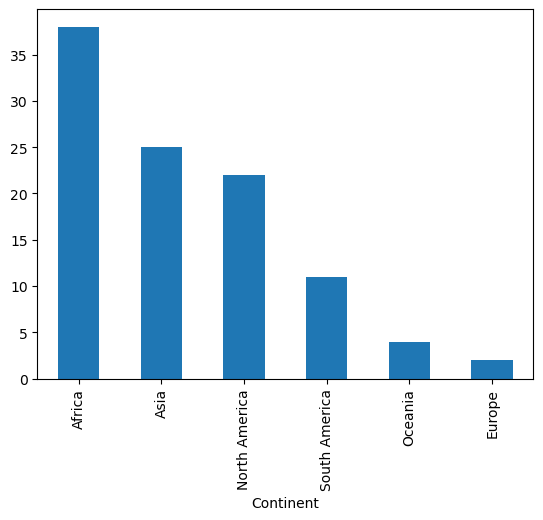

In [20]:
df["Continent"].value_counts().plot(kind = "bar")

# finding the outliers

<Axes: >

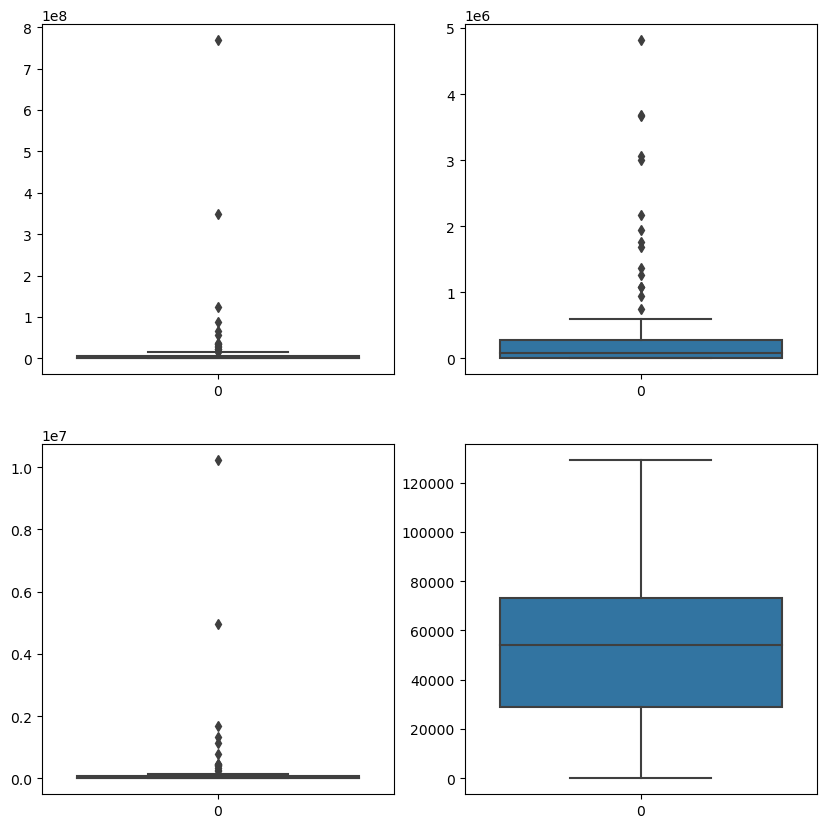

In [21]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])

plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person_(Kg)"])
            
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
            
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

# data distribution 

C:\Users\godde\AppData\Local\Temp\ipykernel_15708\3817117459.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\godde\AppData\Local\Temp\ipykernel_15708\3817117459.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_Person_(Kg)"])
C:\Users\god

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

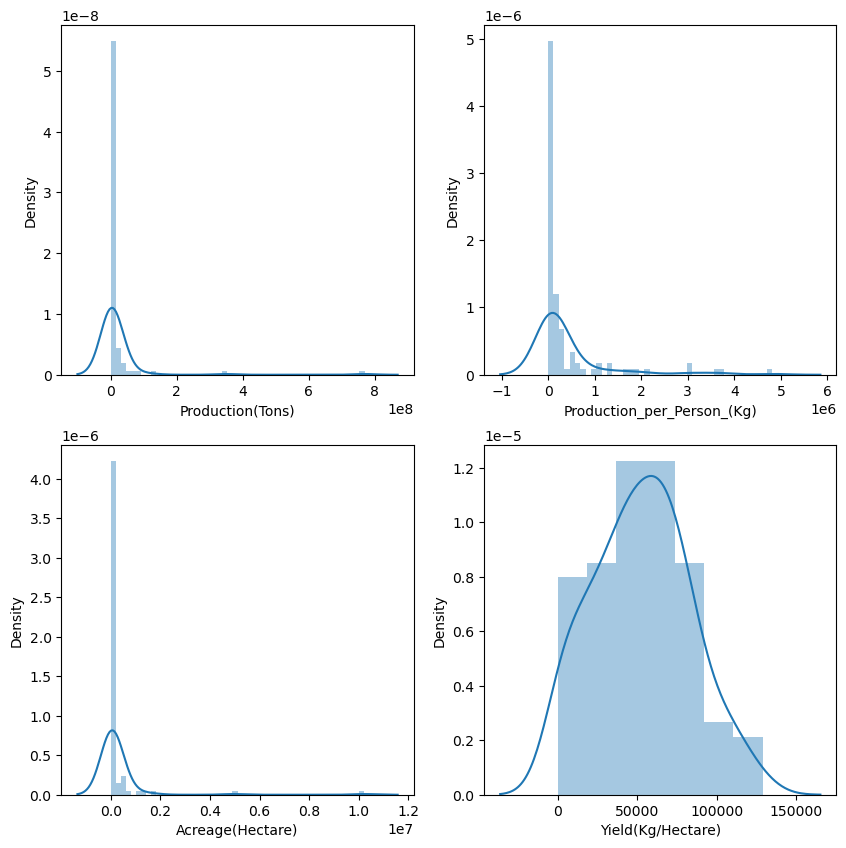

In [22]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])

plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person_(Kg)"])

plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])

plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

# Which country produces maximum sugarcane?

In [23]:
df

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0
...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.0,9.0,43596.5
98,Lebanon,Asia,97.0,16.0,3.0,28386.4
100,Singapore,Asia,50.0,9.0,2.0,25.0
101,Samoa,Oceania,12.0,6.0,1.0,11949.8


In [36]:
df2 = df[["Country" , "Production(Tons)"]].set_index("Country")

In [37]:
df2

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


# percentage of production tons

In [38]:
df2["production(tons)_percentage"] = df2["Production(Tons)"]*100/df2["Production(Tons)"].sum()

In [39]:
df2

,Production(Tons),production(tons)_percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='production(tons)_percentage'>

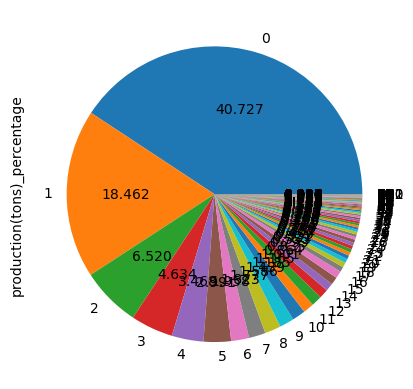

In [42]:
df["production(tons)_percentage"].plot(kind = "pie" , autopct = "%.3f")

<Axes: xlabel='Country'>

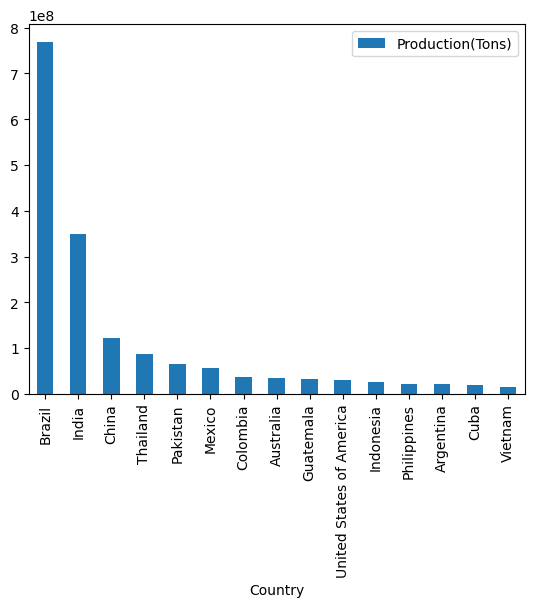

In [43]:
df[["Country","Production(Tons)"]].set_index("Country").sort_values("Production(Tons)" , ascending = False).head(15).plot(kind = "bar")

# Bivariate analysis

In [44]:
df

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),production(tons)_percentage
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5,4.072729e+01
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5,1.846200e+01
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1,6.520138e+00
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2,4.634389e+00
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00
...,...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.0,9.0,43596.5,2.087551e-05
98,Lebanon,Asia,97.0,16.0,3.0,28386.4,5.139401e-06
100,Singapore,Asia,50.0,9.0,2.0,25.0,2.649176e-06
101,Samoa,Oceania,12.0,6.0,1.0,11949.8,6.358022e-07


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America'),
 Text(10, 0, 'Indonesia'),
 Text(11, 0, 'Philippines'),
 Text(12, 0, 'Argentina'),
 Text(13, 0, 'Cuba'),
 Text(14, 0, 'Vietnam'),
 Text(15, 0, 'Egypt'),
 Text(16, 0, 'South Africa'),
 Text(17, 0, 'Myanmar'),
 Text(18, 0, 'Peru'),
 Text(19, 0, 'Ecuador')]

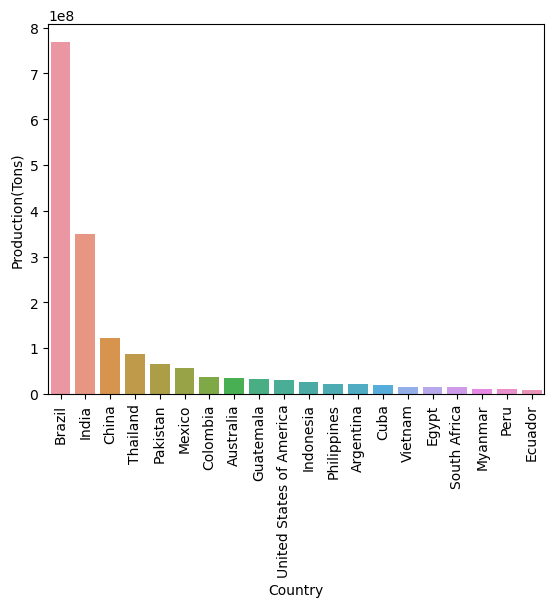

In [45]:
ax = sns.barplot(data = df.head(20) , x = "Country" , y = "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)

# which country has hiegest land

In [60]:
hiegest_land = df.sort_values("Acreage(Hectare)" , ascending = False).head(15)

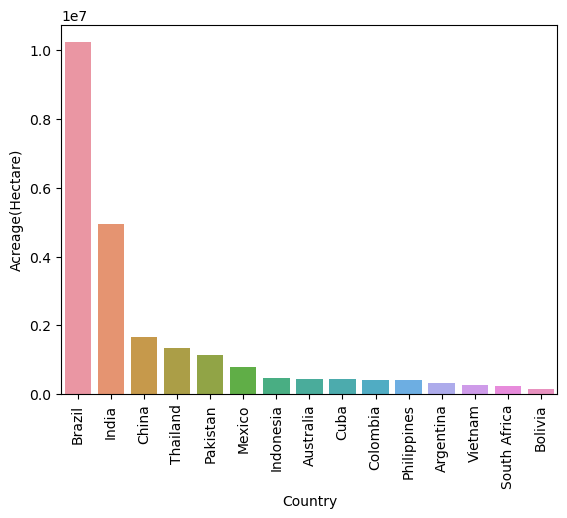

In [61]:
ax = sns.barplot(data = hiegest_land , x = "Country" , y = "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels() , rotation = 90)
plt.show()

# which country has hiegest production

In [62]:
hiegest_production = df.sort_values("Production_per_Person_(Kg)", ascending = False ).head(20)


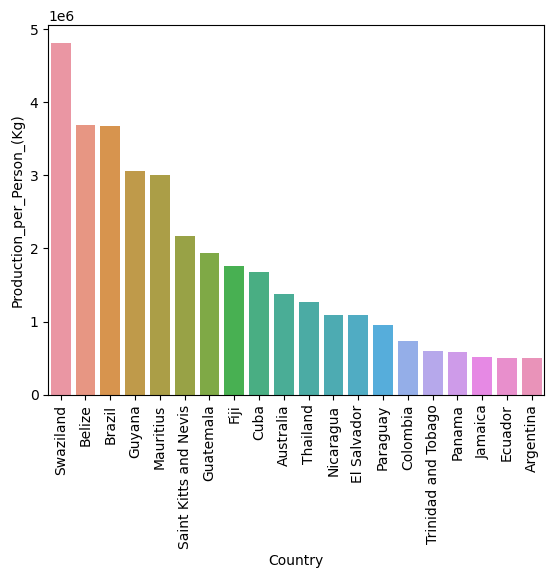

In [64]:
ax = sns.barplot(data = hiegest_production , x ="Country", y = "Production_per_Person_(Kg)" )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      102 non-null    object 
 1   Continent                    102 non-null    object 
 2   Production(Tons)             102 non-null    float64
 3   Production_per_Person_(Kg)   102 non-null    float64
 4   Acreage(Hectare)             102 non-null    float64
 5   Yield(Kg/Hectare)            102 non-null    float64
 6   production(tons)_percentage  102 non-null    float64
dtypes: float64(5), object(2)
memory usage: 10.4+ KB


Country                        0
Continent                      0
Production(Tons)               0
Production_per_Person_(Kg)     0
Acreage(Hectare)               0
Yield(Kg/Hectare)              0
production(tons)_percentage    0
dtype: int64

# Do countries with highest land produce more sugarcane?

In [70]:
df

,Country,Continent,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),production(tons)_percentage
0,Brazil,South America,768678382.0,3668531.0,10226205.0,75167.5,4.072729e+01
1,India,Asia,348448000.0,260721.0,4950000.0,70393.5,1.846200e+01
2,China,Asia,123059739.0,88287.0,1675215.0,73459.1,6.520138e+00
3,Thailand,Asia,87468496.0,1264303.0,1336575.0,65442.2,4.634389e+00
4,Pakistan,Asia,65450704.0,324219.0,1130820.0,57879.0,3.467809e+00
...,...,...,...,...,...,...,...
97,Spain,Europe,394.0,8.0,9.0,43596.5,2.087551e-05
98,Lebanon,Asia,97.0,16.0,3.0,28386.4,5.139401e-06
100,Singapore,Asia,50.0,9.0,2.0,25.0,2.649176e-06
101,Samoa,Oceania,12.0,6.0,1.0,11949.8,6.358022e-07


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

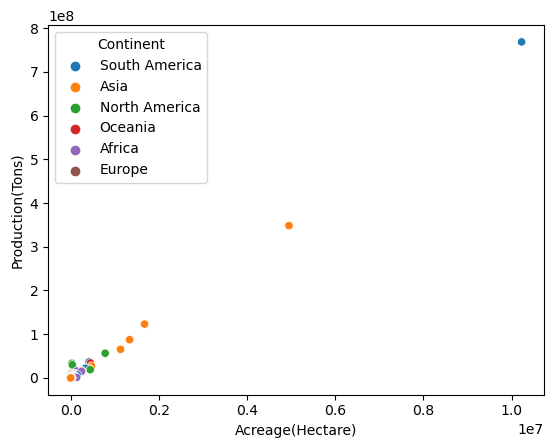

In [71]:
sns.scatterplot(data = df,x = "Acreage(Hectare)" , y = "Production(Tons)", hue = "Continent" )

# Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

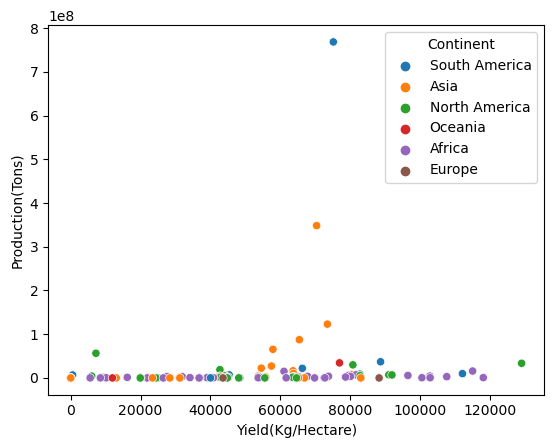

In [73]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)", y = "Production(Tons)" , hue = "Continent")

# continent analysis

# which continent produce max sugercane

In [82]:
df_continent = df.groupby("Continent").sum()

In [84]:
df_continent["number_countrys"] = df.groupby("Continent").count()["Country"]

In [86]:
df_continent

,Country,Production(Tons),Production_per_Person_(Kg),Acreage(Hectare),Yield(Kg/Hectare),production(tons)_percentage,number_countrys
Continent,,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,10144110.0,1439089.0,2142107.5,4.751640,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,3120808.0,10608319.0,1171871.4,38.250414,25
Europe,PortugalSpain,5823.0,536.0,71.0,131870.9,0.000309,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,15420953.0,1581983.0,1082602.4,9.218918,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,3158066.0,490909.0,162419.1,1.916815,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,10228540.0,11369236.0,677192.7,45.861905,11


<Axes: xlabel='Continent'>

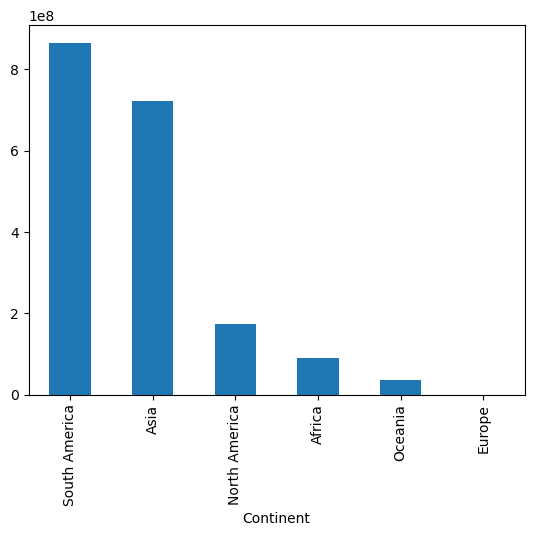

In [90]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind = "bar")

<Axes: ylabel='number_countrys'>

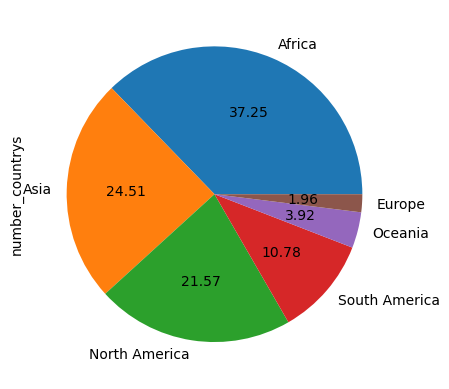

In [92]:
df_continent["number_countrys"].sort_values(ascending = False).plot(kind = "pie", autopct = "%.2f")